In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:>

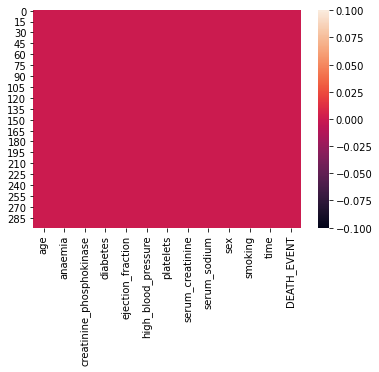

In [8]:
sns.heatmap(df.isnull())

<AxesSubplot:>

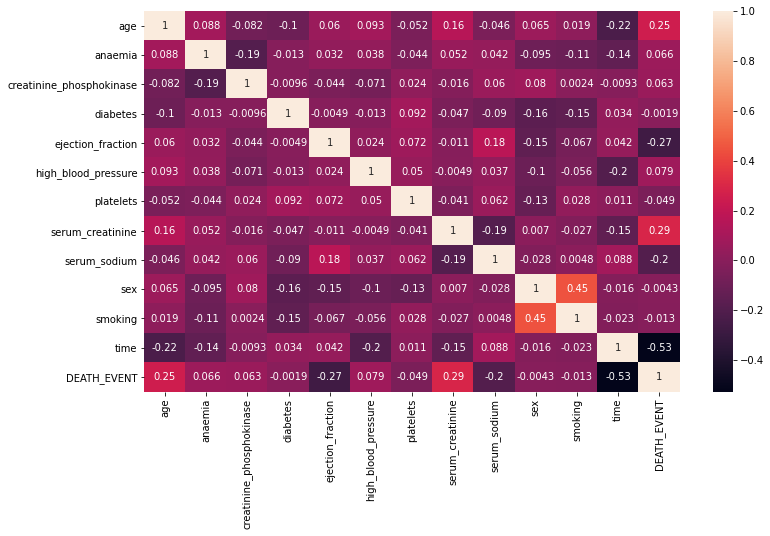

In [10]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

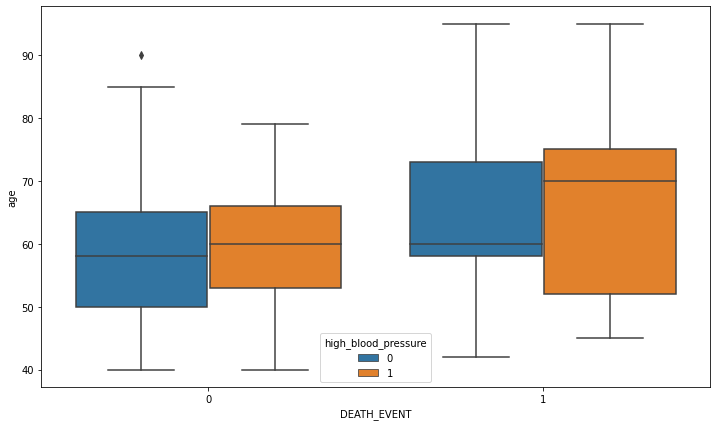

In [13]:
plt.figure(figsize = (12,7))
sns.boxplot(x = df['DEATH_EVENT'], y = df['age'],hue = df['high_blood_pressure'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

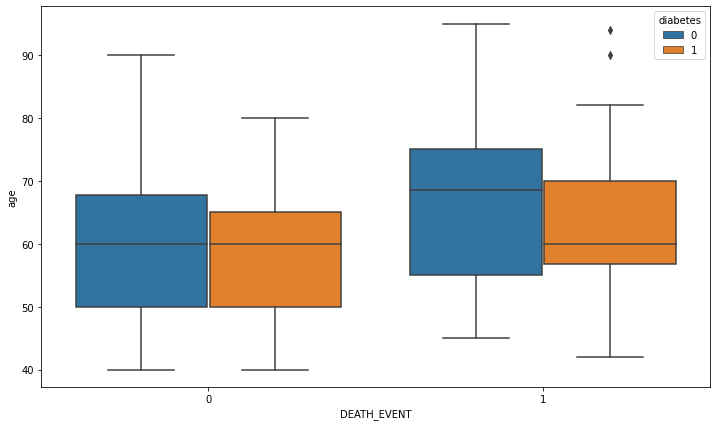

In [21]:
plt.figure(figsize = (12,7))
sns.boxplot(x = df['DEATH_EVENT'], y = df['age'],hue = df['diabetes'])

D:\Coding\virtual environment Py\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

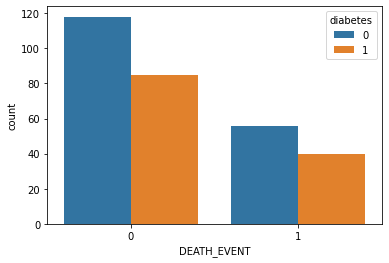

In [17]:
sns.countplot(df['DEATH_EVENT'],hue = df['diabetes'])

<AxesSubplot:xlabel='diabetes'>

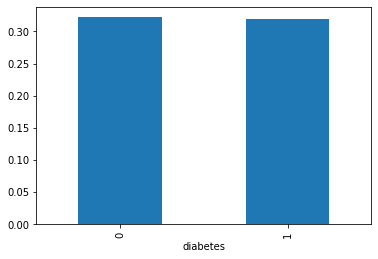

In [24]:
df.groupby('diabetes').mean()['DEATH_EVENT'].plot(kind = 'bar')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

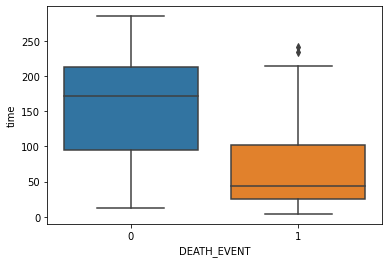

In [26]:
sns.boxplot(x = df['DEATH_EVENT'],y = df['time'])

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
X = df.drop('DEATH_EVENT',axis = 1)
y = df['DEATH_EVENT']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [55]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train.shape

(269, 12)

In [76]:
from sklearn.svm import SVC

In [77]:
model = SVC()

In [78]:
model.fit(X_train,y_train)

SVC()

In [79]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions),confusion_matrix(y_test,predictions),sep = "\n")

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       1.00      0.50      0.67        12

    accuracy                           0.80        30
   macro avg       0.88      0.75      0.76        30
weighted avg       0.85      0.80      0.78        30

[[18  0]
 [ 6  6]]


In [83]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [88]:
personal_data = np.array([[19,0,120,0,30,0,225000.00,1.5,140,1,0,200]])

In [89]:
my_prediction = model.predict(personal_data)

In [95]:
def result(prediction):
    if prediction[0] == 0:
        print("You are Safe !!")
        
    else:
        print("You will die soon !!")

In [96]:
result(my_prediction)

You will die soon !!
